<a href="https://colab.research.google.com/github/stacykeago/EFAC-Data-Analysis-of-employment-trends/blob/main/EFAC_Data_Analysysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 INTRODUCTION

## 1.1 Define the question
### Analyze and interpret the attached data and create a high level report  for the EFAC Stakeholders.


## 1.2 Define the metric for success

## 1.3  Define the context
### Analysis of data from EducationFor All Children

## 1.4 Define the experimental design taken 

## 1.5 Define the appropriateness of the available data to answer the given question
<https://docs.google.com/spreadsheets/d/1gLDoXAAPGSdCXMnxMSJAzatSh9BBN7mc/edit#gid=1550449818>

# 2.0 Import the libraries.

In [66]:
#import the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3.0 Upload the datasets

In [67]:
# Upload the datasets -
# Preview the dataset
df = pd.read_excel('/content/2022 Annual Alumni Survey-Master File.xlsx')
df.head()

,EFAC ID,PS School Name,PS Program of Study,PS Type of degree (level of study),Survey Completion Date,Status in SF,Finish of Coursework,EFAC Secondary Class,EFAC PS Class,What is your current employment status?,...,"If yes, which certifications have you done?",Did you volunteer in the last year?,Organization Name(s) (if you did your community service with an organization),Briefly describe the type of work you did for community service,"Number of hours volunteered in the last year? (E.g. If you volunteer 2 hours on the weekends, that would be 8 hours a month or 72 hours annually.)",Do you have a leadership role in any of the community groups that you volunteer your time with?,"If yes, briefly explain your leadership role(s):",Do you pay fees for the education of others?,How many people's education do you support?,Please specify whose education you support?
0,901,Nairobi Institute of Business Studies,Commerce and Business Administration,Diploma,2023-01-09,Alumni with degree,2015-12-31,2013,2017,Casual/Not Employed,...,Certification in Strategic Management and Lead...,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
1,902,Jomo Kenyatta University,Computers and Information Technology,Bachelors,2023-01-24,Alumni with degree,2017-06-16,2013,2017,Formally Employed,...,NaN,Yes,Mama Ngina Primary School,Participated in the StoryMoja Read Aloud Chall...,2,No,NaN,Yes,4.0,Sister;Brother;Nephew;Niece
2,905,Kenya Medical Training College,Medical Laboratories,Diploma,2023-01-23,Alumni with degree,2016-07-31,2013,2017,Formally Employed,...,"licensing exam, phlebotomy course",No,NaN,NaN,NaN,NaN,NaN,Yes,2.0,Nephew;Niece
3,907,Kenyatta University,Social Science and Humanities,Diploma,2023-01-13,Alumni with degree,2016-03-30,2013,2017,Formally Employed,...,Meal Certification,Yes,Project Girl 4 Girl,Offered mentorship to the mentees selected by G4G,101,No,NaN,Yes,2.0,Sister;Niece
4,908,Africa Nazarene University,Law,Bachelors,2023-01-23,Alumni with degree,2017-08-26,2013,2017,Formally Employed,...,Post Graduate Diploma,No,NaN,NaN,NaN,NaN,NaN,Yes,4.0,Sister;Brother;Son


# 5.0 Accesing dataset information.

In [68]:
#list of column names
print(df.columns)

Index(['EFAC ID', 'PS School Name', 'PS Program of Study',
       'PS Type of degree (level of study)', 'Survey Completion Date',
       'Status in SF', 'Finish of Coursework', 'EFAC Secondary Class',
       'EFAC PS Class', 'What is your current employment status?',
       'Current status if other',
       'What is the name of the company/organization you currently work for?',
       'What is your job title? ', ' What is the level of your job?',
       'When did you begin working for this company/organization?',
       'If you are on a contract, approximately what is the end date?',
       'Are you earning above the Kenya living wage (KSh25,000/month)?',
       'How did you find your job?',
       'Are you actively looking for other employment?',
       'Self Employ: What is the name of your business? (leave blank if n/a)',
       'Self employ: How many paid employees do you have in your business (not including you)?',
       'Self employ: Why did you choose to be self-employed rather

## 5.1 Drop Columns

In [69]:
# Drop columns that will not be part of our analysis
df.drop(["Survey Completion Date", 
         "Current status if other", 
         "What is the name of the company/organization you currently work for?",  
         "Self employ: How many paid employees do you have in your business (not including you)?",
          "Self employ: How many paid employees do you have in your business (not including you)?",
        "Briefly describe the type of work you did for community service",
         "Please specify whose education you support?",
         "How many people's education do you support?",
         "Unemployed: What are you engaged in as you look for employment?",
         "Organization Name(s) (if you did your community service with an organization)",
         "If yes, briefly explain your leadership role(s):",
         "In school: What is your post-graduate program of study and the name of the institution in which you're enrolled?",
         "When did you begin working for this company/organization?",
         "Finish of Coursework",
         "If you are on a contract, approximately what is the end date?",
         "Self Employ: What is the name of your business? (leave blank if n/a)",
         "Self employ: Why did you choose to be self-employed rather than to work for someone else?",              
         "What is your expected completion date?",
         "EFAC Secondary Class","What type(s) of job(s) are you applying/looking for?" ], axis = 1, inplace = True)


## 5.2 Rename columns

In [70]:
df.rename(columns = {'PS Type of degree (level of study)' : 'Degree_type', 
                     'What is your current employment status?' : 'job_Status' ,
                     'Did you volunteer in the last year?': 'Volunteer', 
                     'Do you have a leadership role in any of the community groups that you volunteer your time with?' : 'leadership?',
                     ' What is the level of your job?': 'job_level',
                     'Are you earning above the Kenya living wage (KSh25,000/month)?' : 'Over25K?',                               
                     'Number of hours volunteered in the last year? (E.g. If you volunteer 2 hours on the weekends, that would be 8 hours a month or 72 hours annually.)' : 'V_hours' }, inplace = True)

In [71]:
# Check the items in the column "Jobstatus"
pd.unique(df[['job_Status']].values.ravel())

array(['Casual/Not Employed', 'Formally Employed', 'Self-employed',
       'Paid Internship', 'Contract ', 'Employed',
       'None, because in school full-time ', nan, 'Other',
       'None, currently in school ', 'Volunteering', 'Paid locums ',
       "None, because I'm in a full-time (unpaid) internship"],
      dtype=object)

In [72]:
 row_labels={ "None, because I'm in a full-time (unpaid) internship" : "Unpaid intern"}
df.rename(index= row_labels, inplace=True)


### # Remove spaces between the column names

In [73]:
# Remove spaces between the column names
df.columns = df.columns.str.replace(' ', '')

In [74]:
# Preview column names
print(df.columns)

Index(['EFACID', 'PSSchoolName', 'PSProgramofStudy', 'Degree_type',
       'StatusinSF', 'EFACPSClass', 'job_Status', 'Whatisyourjobtitle?',
       'job_level', 'Over25K?', 'Howdidyoufindyourjob?',
       'Areyouactivelylookingforotheremployment?',
       'Whendidyoustartyouradditionalstudies?',
       'HowhaveyouusedtheEFACCareerResourceCentertohelpwithyourjobsearch?',
       'HaveyoudoneanycertificationsbeyondyourPSdegree? ',
       'Ifyes,whichcertificationshaveyoudone? ', 'Volunteer', 'V_hours',
       'leadership?', 'Doyoupayfeesfortheeducationofothers?'],
      dtype='object')


## 5.3 Missing values

In [75]:
# Number of missing values per column
print(df.isnull().sum())

EFACID                                                                0
PSSchoolName                                                          0
PSProgramofStudy                                                      0
Degree_type                                                           0
StatusinSF                                                            0
EFACPSClass                                                           0
job_Status                                                            1
Whatisyourjobtitle?                                                  44
job_level                                                            45
Over25K?                                                             27
Howdidyoufindyourjob?                                                33
Areyouactivelylookingforotheremployment?                             63
Whendidyoustartyouradditionalstudies?                                92
HowhaveyouusedtheEFACCareerResourceCentertohelpwithyourjobsearch

# 6.0 Data cleaning.

## 6.1 Checking column datatypes

In [76]:
#Checking column datatypes
df.dtypes

EFACID                                                                        int64
PSSchoolName                                                                 object
PSProgramofStudy                                                             object
Degree_type                                                                  object
StatusinSF                                                                   object
EFACPSClass                                                                   int64
job_Status                                                                   object
Whatisyourjobtitle?                                                          object
job_level                                                                    object
Over25K?                                                                     object
Howdidyoufindyourjob?                                                        object
Areyouactivelylookingforotheremployment?                                    

# 7.0 Analysis 

## 7.2 Bivariate Analysis

1. scatter plots
2. line charts to determine the relationship between variables, describing the relationship between two quantitative variables, computing and interpreting the Pearson correlation coefficient. 
3. Provide recommendations for effectively performing bivariate analysis while working on the current problem.

# Analysis

Multivariate Analysis
1. finding relationships between variables using multiple regression analysis 
2. applying reduction techniques to the analysis. 
3. provide recommendations for effectively performing univariate analysis.
4. recommendations for effectively performing multivariate analysis while working on the current problem.

###  To determine the number of students Formally employed and earn over 25,000KSH and group them according to university

In [77]:
#To determine the number of students Formally employed and earn over 25,000KSH and group them according to university

B= df.loc[( df['job_Status']=='Formally Employed')& (df['Over25K?']=='Yes')]
B.value_counts('PSSchoolName')


PSSchoolName
Jomo Kenyatta University                  6
Africa Nazarene University                5
Kenyatta University                       4
University of Nairobi                     3
Multimedia University                     2
Technical University of Kenya             2
Technical University of Mombasa           2
University of Eldoret                     2
Egerton University                        1
Karatina University                       1
Kenya Medical Training College            1
Kenya Medical Training College - Bomet    1
Carol Teachers College                    1
Kibabii University                        1
African Leadership University             1
Kisumu Polytechnic                        1
Maseno University                         1
Masinde Muliro University                 1
University of Kabianga                    1
Kisii University                          1
dtype: int64

### To determine the number of people earning above 25,000 according to degree type

In [78]:
#To determine the number of people earning above 25,000 according to degree type
#
MM=df.loc[(df['Over25K?']=='Yes')]   
MM.value_counts('Degree_type') 


Degree_type
Bachelors    28
Diploma      15
dtype: int64

### How do the results change within the different segments e.g with Bachelors vs. Diploma or 

In [79]:
# To determine the number of people employed according to degree type
MO=df.loc[(df['job_Status']== 'Formally Employed')]     
MO.value_counts('Degree_type') 

Degree_type
Bachelors    33
Diploma      16
dtype: int64

In [80]:
#  To determine the number of people employed according to degree type
MO=df.loc[(df['job_Status']== 'Casual/Not Employed')]     
MO.value_counts('Degree_type') 

Degree_type
Bachelors    8
Diploma      6
dtype: int64

<Axes: xlabel='job_Status', ylabel='count'>

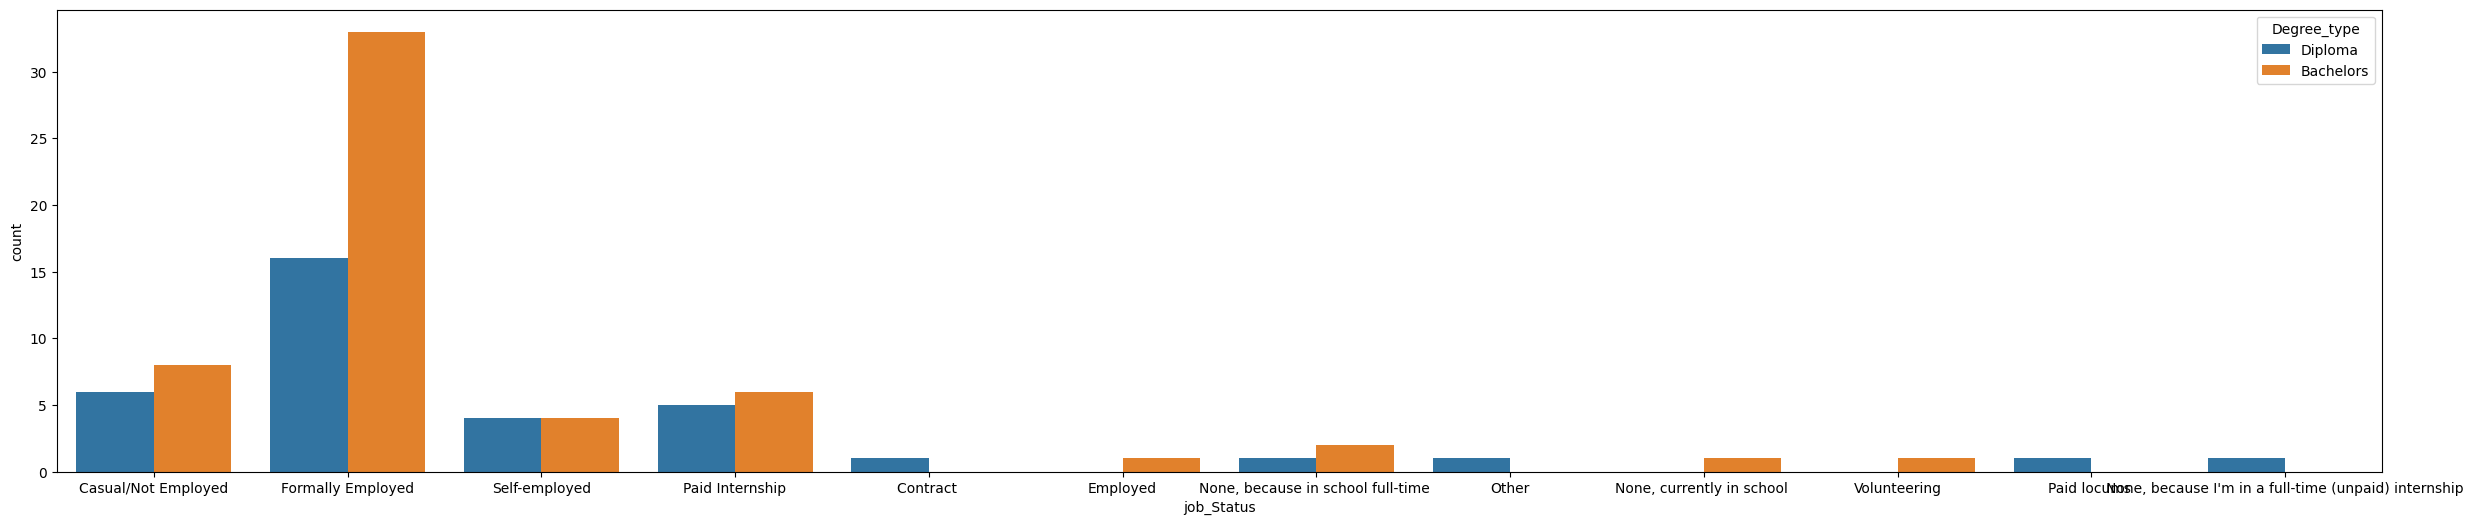

In [81]:
#DCompare Job status vs Degree type
#
plt.figure(figsize=(30, 6))
sns.countplot(x='job_Status', data=df ,hue= 'Degree_type' )

### How do the results change within the different segments Alumni w degree vs. Alumni w/o degree

In [82]:
#  To determine the number of people employed within the different segments Alumni w degree vs. Alumni w/o degree
MO=df.loc[(df['job_Status']== 'Formally Employed')]     
MO.value_counts('StatusinSF') 

StatusinSF
Alumni with degree    34
Alumni w/o degree     15
dtype: int64

In [83]:
# To determine the number of people NOT-employed within the different segments Alumni w degree vs. Alumni w/o degree
PO=df.loc[(df['job_Status']== 'Casual/Not Employed')]     
PO.value_counts('StatusinSF') 

StatusinSF
Alumni w/o degree     7
Alumni with degree    7
dtype: int64

### Compare Job status vs Alumni with degree or Alumni without degree

<Axes: xlabel='job_Status', ylabel='count'>

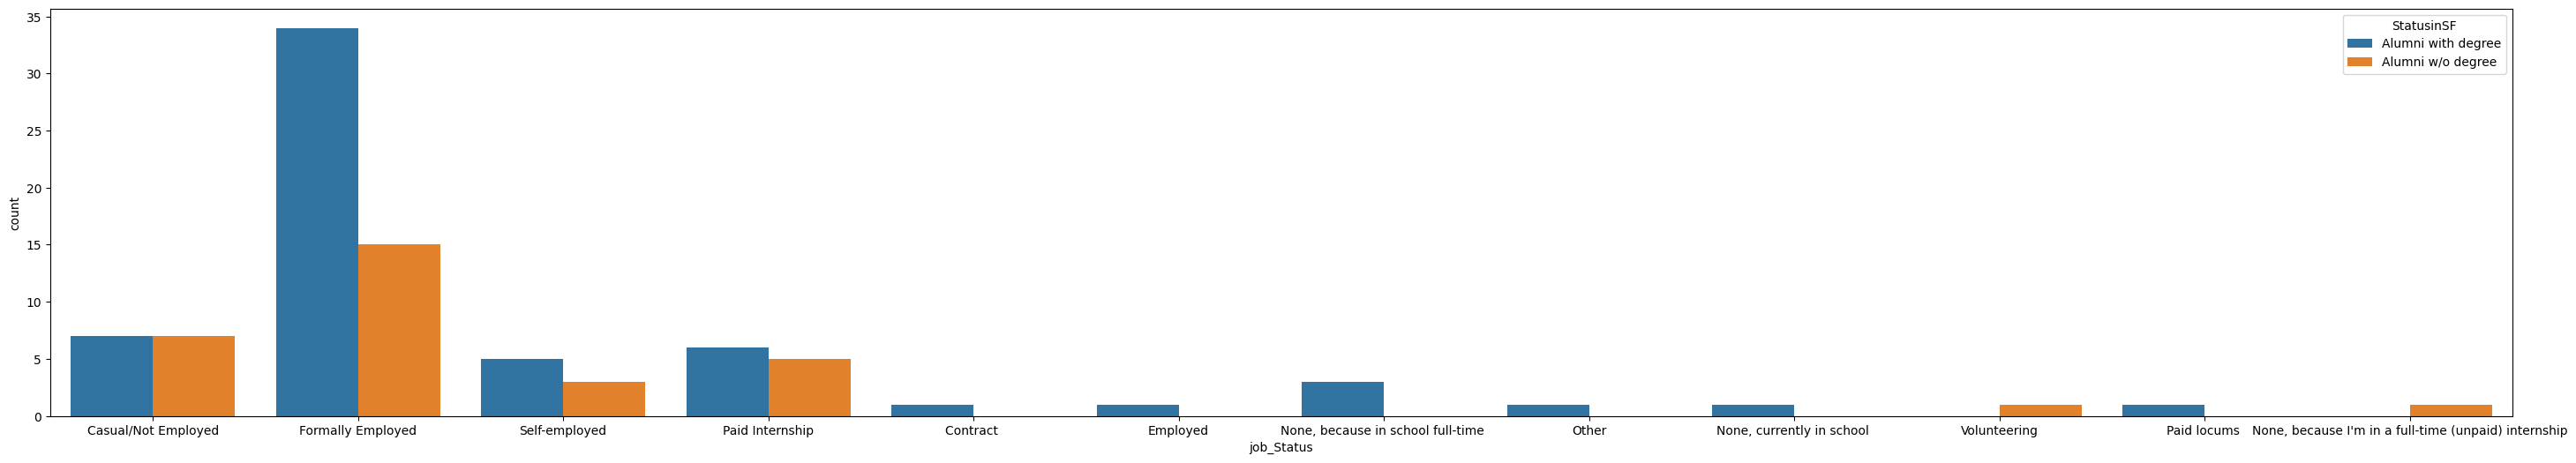

In [84]:
#Compare Job status vs Alumni with degree or Alumni without degree
#
plt.figure(figsize=(36, 6))
sns.countplot(x='job_Status', data=df ,hue= 'StatusinSF')

### What is the employment rate per field of study?

In [85]:
KO=df.loc[(df['job_Status']== 'Casual/Not Employed')]     
KO.value_counts('PSProgramofStudy') 

PSProgramofStudy
Social Science and Humanities           4
Agriculture                             2
Economics and Statistics                2
Mathematics                             2
Commerce and Business Administration    1
Communication and Journalism            1
Education                               1
Environmental Science                   1
dtype: int64

In [86]:
KO=df.loc[(df['job_Status']== 'Formally Employed')]     
KO.value_counts('PSProgramofStudy') 

PSProgramofStudy
Computers and Information Technology    9
Social Science and Humanities           6
Economics and Statistics                5
Law                                     5
Commerce and Business Administration    4
Agriculture                             3
Engineering                             3
Mathematics                             3
Construction                            2
Hospitality and Tourism                 2
Medical Laboratories                    2
Education                               1
Human Resources                         1
Nursing                                 1
Other                                   1
Public Health                           1
dtype: int64

<Axes: xlabel='job_Status', ylabel='count'>

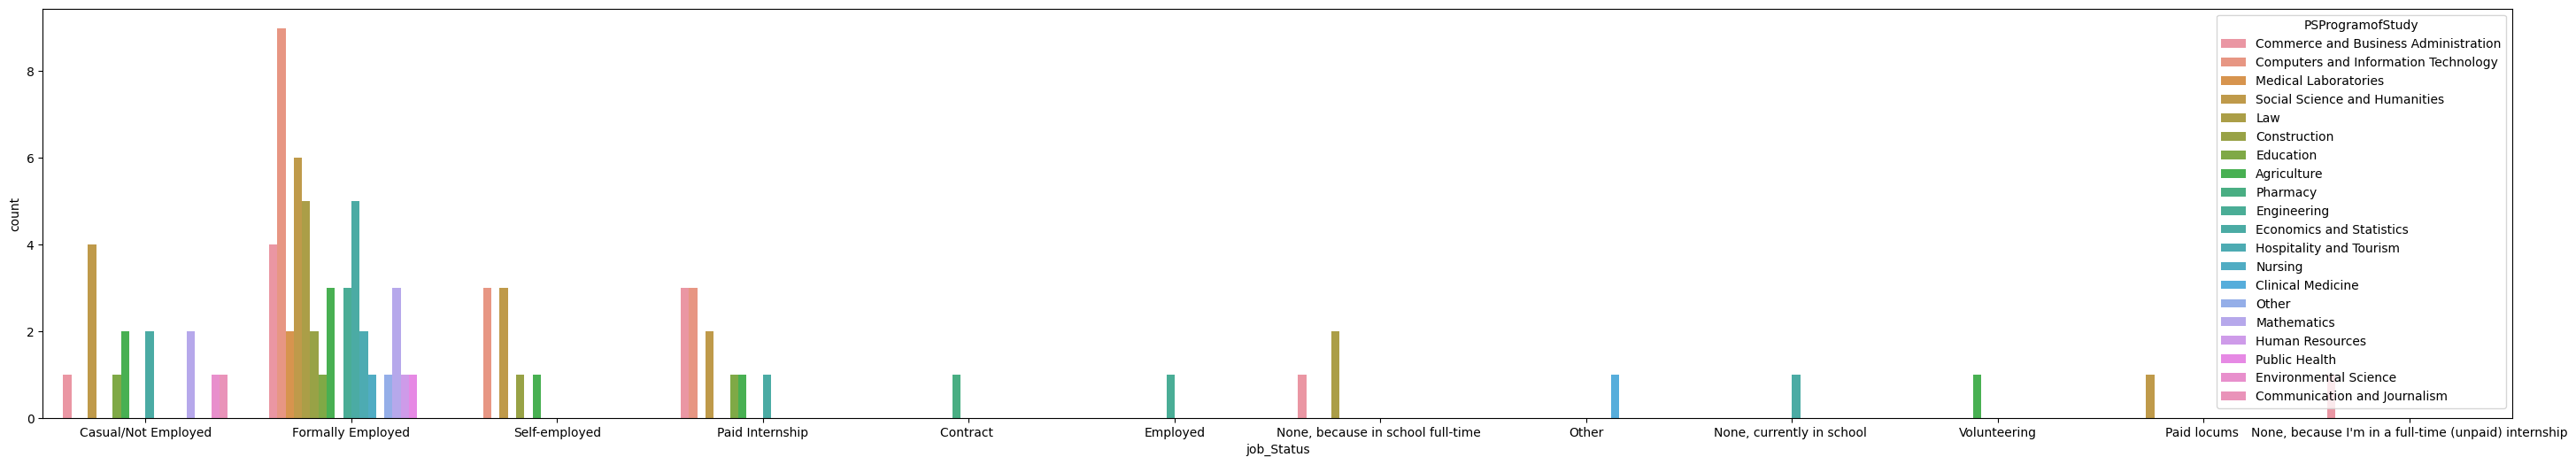

In [87]:
#Compare Job status vsProgram studied
plt.figure(figsize=(36, 6))
sns.countplot(x='job_Status', data=df ,hue= 'PSProgramofStudy')

### To determine whether volunteer experience determines if one gets a job


<Axes: xlabel='job_Status', ylabel='count'>

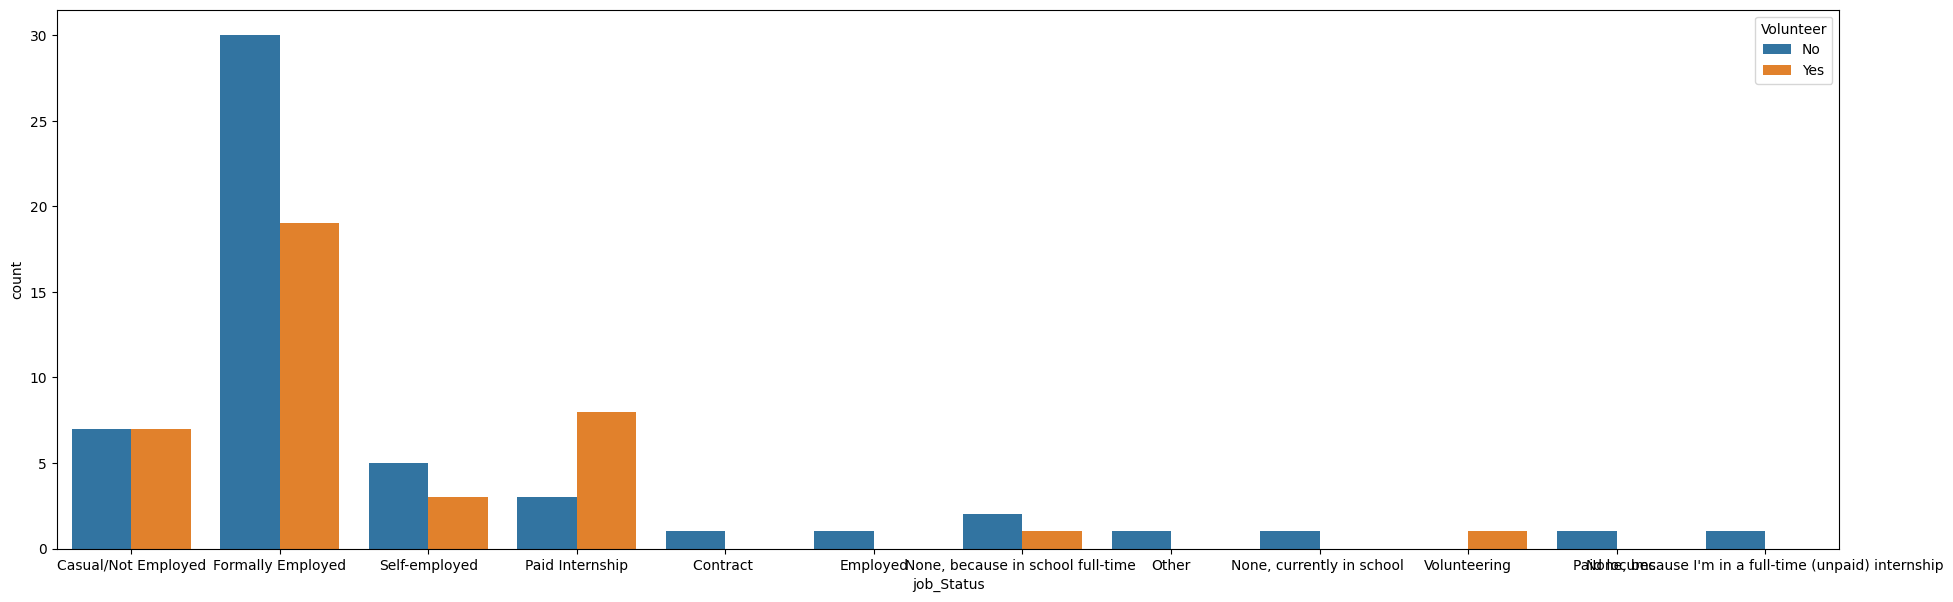

In [88]:
#To determine whether volunteer experience determines if one gets a job
#
plt.figure(figsize=(23,7))
sns.countplot(x='job_Status', data=df ,hue='Volunteer' )

## CONCLUSION


From the analysis we can derive the following:
1. 

##RECOMMENDATIONS